In [1]:
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt

import math

from sklearn.svm import SVC, LinearSVC

# für das Erstellen der verschiedenen Trainingsmengen
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import auc, average_precision_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import cohen_kappa_score
from sklearn.utils import shuffle
from sklearn.utils.multiclass import unique_labels

from skimage import exposure, feature, transform

import pickle as pkl
from sklearn.decomposition import PCA

from itertools import product

import seaborn as sns

import time
import timeit
from timeit import default_timer as timer

#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

import csv
import pandas as pd
# zum Visualisieren der Daten mithilfe von PCA
from mpl_toolkits.mplot3d import Axes3D

# für plotten von Precision-Recall
from sklearn import svm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


#!pip install ipynb
#import ipynb.fs.full.save_load
#from ipynb.fs.full.save_load import load_hog_features, load_vgg16_features, load_labels, save_trained_model_as_pkl, load_trained_model_from_pkl, save_as_csv, read_csv, make_subsets_training_data_A, print_sentence
 
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
!pip install import-ipynb
import import_ipynb
import save_load
from save_load import load_hog_features, load_vgg16_features, load_labels, save_trained_model_as_pkl, load_trained_model_from_pkl, save_as_csv, read_csv, make_subsets_training_data_A, print_sentence
import tools
from tools import roc_auc_score_multiclass, roc_auc_score_single_class, scale_train_test_data, scale_train_test_data_without_std, scale_train_test_data_without_mean



importing Jupyter notebook from save_load.ipynb
Hallo angekommen
importing Jupyter notebook from tools.ipynb


In [2]:
# Trainings- und Testdaten laden
def load_hog_features(path_train):
    X_train = np.load(path_train)
    return X_train

def load_hog_features_test(path_test):
    X_test = np.load(path_test)
    return X_test

def load_train_labels(path_train):
    y_train = np.load(path_train)
    return y_train

def load_test_labels(path_test):
    y_test = np.load(path_test)
    return y_test

def load_vgg16_features(path_vgg16_feat):    
    X_vgg16 = np.load(path_vgg16_feat)
    return X_vgg16

def load_labels(path_train):
    y_label = np.load(path_train)
    return y_label

In [3]:
# erstellen unterschiedlicher Trainingsmengen aus 60000 Trainingsdaten
# random_state=0
def make_subsets_training_data_A(X_tr, y_tr):    
    #Trainingsmenge mit 40.000 Bilder erzeugen
    X_tr_40000, X_te_10000_b, y_tr_40000, y_te_10000_b = train_test_split(X_tr, y_tr, random_state = 0, test_size=1/3, stratify=y_tr)
    #Trainingsmenge mit 20.000 Bilder erzeugen
    X_tr_20000, X_te_10000_d, y_tr_20000, y_te_10000_d = train_test_split(X_tr_40000, y_tr_40000, random_state = 0, test_size=1/2, stratify=y_tr_40000)
    #Trainingsmenge mit 10.000 Bilder erzeugen
    X_tr_10000, X_te_10000_e, y_tr_10000, y_te_10000_e = train_test_split(X_tr_20000, y_tr_20000, random_state = 0, test_size=1/2, stratify=y_tr_20000)
    #Trainingsmenge mit 5.000 Bilder erzeugen
    X_tr_5000, X_te_5000, y_tr_5000, y_te_5000 = train_test_split(X_tr_10000, y_tr_10000, random_state = 0, test_size=1/2, stratify=y_tr_10000)
    #Trainingsmenge mit 2.000 Bilder erzeugen
    X_tr_2000, X_te_3000, y_tr_2000, y_te_3000 = train_test_split(X_tr_5000, y_tr_5000, random_state = 0, test_size=3/5, stratify=y_tr_5000)
    #Trainingsmenge mit 1.000 Bilder erzeugen
    X_tr_1000, X_te_1000, y_tr_1000, y_te_1000 = train_test_split(X_tr_2000, y_tr_2000, random_state = 0, test_size=1/2, stratify=y_tr_2000)
    #Trainingsmenge mit 500 Bilder erzeugen
    X_tr_500, X_te_500, y_tr_500, y_te_500 = train_test_split(X_tr_1000, y_tr_1000, random_state = 0, test_size=1/2, stratify=y_tr_1000)
    return X_tr_40000, y_tr_40000, X_tr_20000, y_tr_20000, X_tr_10000, y_tr_10000, X_tr_5000, y_tr_5000, X_tr_2000, y_tr_2000, X_tr_1000, y_tr_1000, X_tr_500, y_tr_500   

In [4]:
# Classification report ausgeben
def classif_report(y_te, y_pred):    
    print(classification_report(y_te, y_pred))   
    
    
'''
Erstellt eine nicht normalisierte Konfusionsmatrix 
'''
def plot_confusion_matrix(y_test, y_pred, number, title):    
    normalize=False
    cmap = plt.cm.Blues
    classes = ['T-Shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle-boot']
    title = '\n'+title   
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    fig.suptitle('                 Confusion matrix', fontsize=16, fontweight='medium')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set_title(title, fontsize=10, fontweight='normal')
    ax.set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          xticklabels=classes, yticklabels=classes,         
          ylabel = 'True label',
          xlabel = 'Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
    
    fmt = '.2f' if normalize else'd'
    thresh = cm.max() / 2.
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    np.set_printoptions(precision=2)
    plt.show()
    return fig



# in Anlehnung an:   https://medium.com/@plog397/auc-roc-curve-scoring-function-for-multi-class-classification-9822871a6659
def roc_auc_score_multiclass(y_test, y_pred, average='macro'):    
    labelBin = LabelBinarizer()
    labelBin.fit(y_test)    
    y_test = labelBin.transform(y_test)
    y_pred = labelBin.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)



'''
Roc_Auc_score für die einzelnen Klassen berechnen
'''
def roc_auc_score_single_class(y_test, y_pred, average = "macro"):
    # Menge der einzelnen Klassen erstellen
    single_classes = set(y_test)
    roc_aucs = {}
    for cl in single_classes:
        #Liste der restlichen Klassen erstellen
        remain_classes = [x for x in single_classes if x != cl]

        # aktuelle Klasse mit 1 markieren und alle anderen Klassen mit 0
        y_test_roc = [0 if x in remain_classes else 1 for x in y_test]
        y_pred_roc = [0 if x in remain_classes else 1 for x in y_pred]

        # roc_auc_score berechnen
        roc_auc = roc_auc_score(y_test_roc, y_pred_roc, average = average)
        roc_aucs[cl] = roc_auc

    return roc_aucs




'''
Tuning der Hyperparameter mit GridSearchCV

Mit refit=True (Standardeinstellung) wird der beste Estimator, welcher über 
die Kreuzvalidierung gefunden wurde, zusätzlich mit dem gesamten
Trainingsdatensatz trainiert 
scaler 0 = ohne StandardScaler
scaler 1 = mit StandardScaler ohne std
scaler 2 = mit StandardScaler
pca 0 = ohne PCA
pca 1 = mit PCA
'''
def tuning_hyper_params(X, y, X_test, y_test, kernel='LinearSVC',cv=3,                       
                        scaler=0,pca=0,
                        c_range=np.logspace(-16,10,14, base=2), 
                        gamma_range=np.logspace(-16,4,11, base=2), penalty='l2', loss='squared_hinge',                       
                        seed=1):    
    seed = seed
    np.random.seed(seed)    
    start=time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()
    time_list = [] # Zeit für GridSearch
    
    scoring = {'Precision': make_scorer(precision_score, average='macro'),
               'Recall': make_scorer(recall_score, average='macro'),
               'F1': make_scorer(f1_score, average='macro'),
               'acc': make_scorer(accuracy_score),
               'roc': make_scorer(roc_auc_score_multiclass, average='macro')}    
                  
    if kernel == 'LinearSVC':        
        if scaler == 0:            
            pipeline = Pipeline([              
                ("svm", LinearSVC(penalty=penalty, loss=loss, random_state=seed))])
        if scaler == 1:
            pipeline = Pipeline([
                ("scaler", StandardScaler(with_std=False)),
                ("svm", LinearSVC(penalty=penalty, loss=loss, random_state=seed))
            ])
        if scaler == 2:
            pipeline = Pipeline([
                ("scaler", StandardScaler()),
                ("svm", LinearSVC(penalty=penalty, loss=loss, random_state=seed))
            ])                 
        param_grid=[{'svm__C': c_range}]                        
        clf = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, refit='acc', n_jobs=-1)
        clf.fit(X,y)        
        print('\n C_range:', c_range)
        print('\n Bester Score: ',clf.best_score_)
        print('\n Besten Parameter: ', clf.best_params_)            
                        
    elif kernel == 'rbf':
        if scaler == 2:
            pipeline = Pipeline([("scaler", StandardScaler()),
                                 ("svm", SVC(decision_function_shape='ovo', random_state=seed))])                        
        param_grid=[{'svm__C': c_range, 'svm__gamma': gamma_range}]                  
        clf = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, refit='acc', n_jobs=-1)
        clf.fit(X,y)        
        print('\n C_range: ', c_range)
        print('\n gamma_range:', gamma_range)
        print('\n Beste Score: ',clf.best_score_)
        print('\n Besten Parameter: ', clf.best_params_)
        
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3
    time_list.append([end,end2,end3])   
    
    # Nur korrekt, wenn kein StandardScaler verwendet wurde
    if scaler == 0:
        print("Bester Estimator score: ",clf.best_estimator_.score(X_test, y_test))            
       
    for mean, stdev, param in zip(clf.cv_results_['mean_test_Precision'],
                              clf.cv_results_['std_test_Precision'],
                              clf.cv_results_['params']):
        print("Precision-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_Recall'], 
                              clf.cv_results_['std_test_Recall'],clf.cv_results_['params']):
        print("Recall-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_F1'], 
                              clf.cv_results_['std_test_F1'],clf.cv_results_['params']):
        print("F1-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_acc'], clf.cv_results_['std_test_acc'],
                              clf.cv_results_['params']):
        print("Accuracy-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))  
                
    for mean, stdev, param in zip(clf.cv_results_['mean_test_roc'],clf.cv_results_['std_test_roc'],
                              clf.cv_results_['params']):
        print("Roc-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))    
    return clf, time_list


'''
Verfeinerten Suchbereich für gefundenen Parameter bestimmen
Schrittweite 1/4 im Exponenten, d.h. wenn z.B. 8 der gefundene Parameter ist,
np.log2(8) = 3    ---> np.logspace(1,5,17,base=2)
'''
def get_finer_range(number):
    exp = np.log2(number) #Exponent bestimmen, Basis 2
    range = np.logspace(exp-2, exp+2, 17, base=2)
    return range



'''
speichert trainierte Modelle bzw. Ergebnisse wiederholter Grid Search Anwendungen als Pickle-Datei.
Diese gespeicherten Modelle können mit Funktion   load_trained_model_from_pkl(name)
'''

def save_trained_model_as_pkl(model, filename):
    with open(filename, 'wb') as file:
        pkl.dump(model, file)        
        
        
'''
lädt bereits trainiertes, als Pickle-Datei gespeichertes Modell bzw. Ergebnisse wiederholter
Grid Search Anwendungen
'''
def load_trained_model_from_pkl(filename):
    with open(filename, 'rb') as file:
        new_model=pkl.load(file)
    return new_model      



'''
speichern und lesen von CSV-Dateien
'''
def save_as_csv(list,path,name):
    path = path+name    
    with open(path, "w") as file:
        csv_wr = csv.writer(file)
        csv_wr.writerows(list)
        
def read_csv(path):
    read_file = []
    with open(path, "r") as file:
        csv_r = csv.reader(file)
        for row in csv_r:
            if row:
                read_file.append(row)
    return read_file




'''
LinearSVC trainieren, ohne StandardScaler
'''
def train_LinearSVC(X_tr, X_te, y_tr, y_te, seed, number, C, penalty, loss, front_path, end_path, feature):
    
    path = front_path+"/"+number+"/"+end_path+"/"
    # Liste in welcher die berechneten Metriken gespeichert werden
    metrics = []
    # Liste für Trainingszeiten
    time_list = []
    #Liste für Testzeiten
    time_list_test = []
           
    # LinearSVC mit den Daten trainieren und speichern
    start = time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()
    
    linSVC = LinearSVC(C=C, penalty = penalty, loss=loss, random_state=seed)
    linSVC.fit(X_tr, y_tr)
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3            
    end_per_sample = end/int(number)
    end2_per_sample = end2/int(number)
    end3_per_sample = end3/int(number)
    # Trainingszeiten speichern
    time_list.append([end,end2,end3])    
    time_list.append([end_per_sample, end2_per_sample, end3_per_sample])
    save_as_csv(time_list, path, 'Trainingszeiten.csv')
    
    # trainiertes Modell speichern
    save_trained_model_as_pkl(linSVC, path+"LinearSVC_"+number+"_"+feature)    
                              
    # Vorhersage machen und speichern
    y_pred = linSVC.predict(X_te)    
    np.save(path+"y_pred_label.npy", y_pred) 
    # zusätzlich Label der Testdaten speichern, auch wenn eigentlich überflüssig
    np.save(path+"y_test_label.npy", y_te)
                                  
    # Metriken berechnen und speichern                          
    acc = accuracy_score(y_te, y_pred)                  
    prec = precision_score(y_te, y_pred, average='macro')    
    rec = recall_score(y_te, y_pred, average='macro')   
    f1 = f1_score(y_te, y_pred, average='macro') 
    roc = roc_auc_score_multiclass(y_te, y_pred, average='macro')
    kappa = cohen_kappa_score(y_te, y_pred)
    metrics.append([acc,prec,rec,f1,roc, kappa])
    save_as_csv(metrics,path,'metrics.csv')  
    
    roc_single_class = roc_auc_score_single_class(y_te, y_pred, average='macro')
    np.save(path+"roc_auc_score_single_class.npy", roc_single_class)
    
    # Confusion Matrix erstellen und speichern
    title = '(LinearSVC '+number+' C='+str(C)+')'
    cm = plot_confusion_matrix(y_te, y_pred, number, title)     
    cm.savefig(path+"Confusion_matrix.png")    
    
    # Performanz mit Testdaten testen und Klassifikationszeit speichern
    start4 = time.time()
    start5 = time.process_time()
    start6 = time.perf_counter()
    test_acc = linSVC.score(X_te, y_te)
    end4 = time.time()-start4
    end5 = time.process_time()-start5
    end6 = time.perf_counter()-start6
    end4_per_sample = end4/int(number)
    end5_per_sample = end5/int(number)
    end6_per_sample = end6/int(number)
    # Klassifikationszeiten speichern
    time_list_test.append([end4,end5,end6])    
    time_list_test.append([end4_per_sample, end5_per_sample, end6_per_sample])
    save_as_csv(time_list_test, path, 'Testzeiten.csv')
    print("Test accuracy: ",test_acc,'\n')
    
    # Klassifikationsreport erstellen und speichern
    classif_report(y_te, y_pred)
        
    # precision, recall und f-Score pro Klasse speichern
    save_as_csv(precision_recall_fscore_support(y_te, y_pred), path, 'precision_recall_fscore.csv') 

In [5]:
'''
Trainings- und Testdaten (VGG16-Features) laden
'''
X_train_vgg16 = load_vgg16_features("Fashion_MNIST_VGG16_Data/Vgg16_Trainingsdaten.npy")
X_test_vgg16 = load_vgg16_features("Fashion_MNIST_VGG16_Data/Vgg16_Testdaten.npy")
y_train_vgg16 = load_labels("Fashion_MNIST_VGG16_Data/Vgg16_Train_Label.npy")
y_test_vgg16 = load_labels("Fashion_MNIST_VGG16_Data/Vgg16_Test_Label.npy")

In [6]:
'''
Trainingsdatensätze unterschiedlicher Größe erstellen
random_state=A
'''
X_tr_40000, y_tr_40000, X_tr_20000, y_tr_20000, X_tr_10000, y_tr_10000, X_tr_5000, y_tr_5000, X_tr_2000, y_tr_2000, X_tr_1000, y_tr_1000, X_tr_500, y_tr_500 = make_subsets_training_data_A(X_train_vgg16, y_train_vgg16)

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


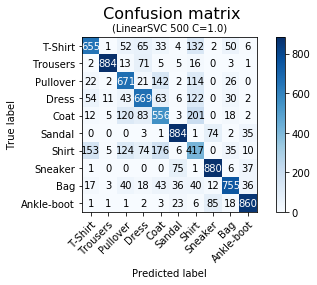

Test accuracy:  0.7231 

              precision    recall  f1-score   support

           0       0.71      0.66      0.68      1000
           1       0.97      0.88      0.92      1000
           2       0.63      0.67      0.65      1000
           3       0.67      0.67      0.67      1000
           4       0.54      0.56      0.55      1000
           5       0.85      0.88      0.86      1000
           6       0.40      0.42      0.41      1000
           7       0.84      0.88      0.86      1000
           8       0.80      0.76      0.78      1000
           9       0.87      0.86      0.86      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


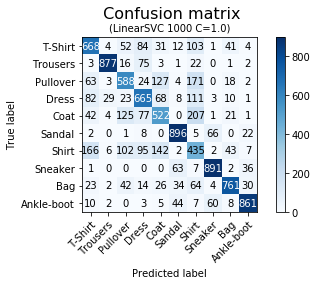

Test accuracy:  0.7164 

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1000
           1       0.95      0.88      0.91      1000
           2       0.62      0.59      0.60      1000
           3       0.64      0.67      0.65      1000
           4       0.56      0.52      0.54      1000
           5       0.84      0.90      0.87      1000
           6       0.38      0.43      0.41      1000
           7       0.87      0.89      0.88      1000
           8       0.84      0.76      0.80      1000
           9       0.89      0.86      0.88      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


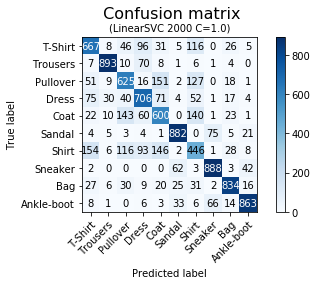

Test accuracy:  0.7404 

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      1000
           1       0.92      0.89      0.91      1000
           2       0.62      0.62      0.62      1000
           3       0.67      0.71      0.69      1000
           4       0.58      0.60      0.59      1000
           5       0.87      0.88      0.88      1000
           6       0.48      0.45      0.46      1000
           7       0.86      0.89      0.87      1000
           8       0.86      0.83      0.85      1000
           9       0.90      0.86      0.88      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


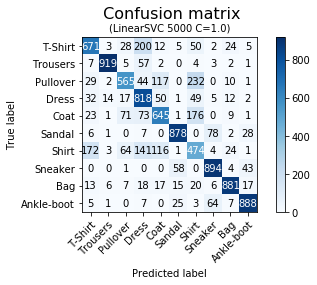

Test accuracy:  0.7633 

              precision    recall  f1-score   support

           0       0.70      0.67      0.69      1000
           1       0.97      0.92      0.94      1000
           2       0.75      0.56      0.64      1000
           3       0.60      0.82      0.69      1000
           4       0.67      0.65      0.66      1000
           5       0.89      0.88      0.89      1000
           6       0.47      0.47      0.47      1000
           7       0.85      0.89      0.87      1000
           8       0.90      0.88      0.89      1000
           9       0.90      0.89      0.89      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


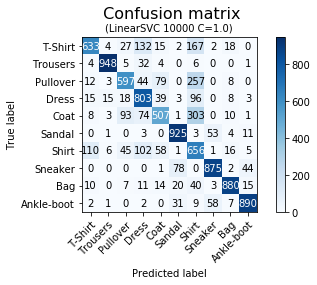

Test accuracy:  0.7714 

              precision    recall  f1-score   support

           0       0.80      0.63      0.71      1000
           1       0.97      0.95      0.96      1000
           2       0.75      0.60      0.67      1000
           3       0.67      0.80      0.73      1000
           4       0.71      0.51      0.59      1000
           5       0.87      0.93      0.90      1000
           6       0.43      0.66      0.52      1000
           7       0.88      0.88      0.88      1000
           8       0.92      0.88      0.90      1000
           9       0.92      0.89      0.90      1000

    accuracy                           0.77     10000
   macro avg       0.79      0.77      0.77     10000
weighted avg       0.79      0.77      0.77     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


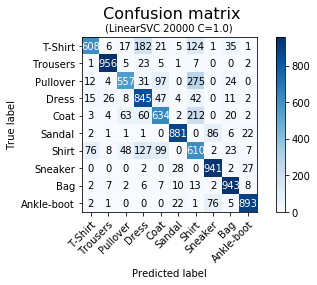

Test accuracy:  0.7868 

              precision    recall  f1-score   support

           0       0.84      0.61      0.71      1000
           1       0.94      0.96      0.95      1000
           2       0.79      0.56      0.65      1000
           3       0.66      0.84      0.74      1000
           4       0.70      0.63      0.66      1000
           5       0.92      0.88      0.90      1000
           6       0.48      0.61      0.53      1000
           7       0.85      0.94      0.89      1000
           8       0.88      0.94      0.91      1000
           9       0.93      0.89      0.91      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


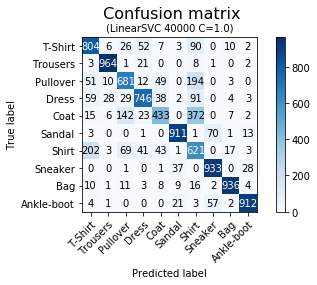

Test accuracy:  0.7941 

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1000
           1       0.95      0.96      0.95      1000
           2       0.71      0.68      0.69      1000
           3       0.83      0.75      0.79      1000
           4       0.75      0.43      0.55      1000
           5       0.93      0.91      0.92      1000
           6       0.44      0.62      0.52      1000
           7       0.88      0.93      0.90      1000
           8       0.96      0.94      0.95      1000
           9       0.94      0.91      0.93      1000

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.79     10000
weighted avg       0.81      0.79      0.79     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


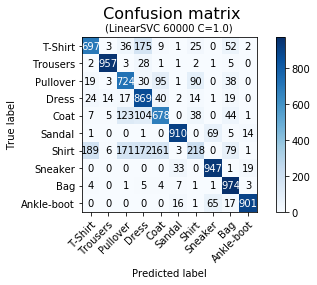

Test accuracy:  0.7875 

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1000
           1       0.97      0.96      0.96      1000
           2       0.67      0.72      0.70      1000
           3       0.63      0.87      0.73      1000
           4       0.69      0.68      0.68      1000
           5       0.93      0.91      0.92      1000
           6       0.56      0.22      0.31      1000
           7       0.87      0.95      0.91      1000
           8       0.79      0.97      0.87      1000
           9       0.96      0.90      0.93      1000

    accuracy                           0.79     10000
   macro avg       0.78      0.79      0.77     10000
weighted avg       0.78      0.79      0.77     10000



In [9]:
############################################################################
##################  LinearSVC, squared_hinge, ohne StandardScaler, ohne PCA ########
############################################################################

#######  seed 1 ##########

train_LinearSVC(X_tr_500, X_test_vgg16, y_tr_500, y_test_vgg16, 1, '500',1.0, 'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_tr_1000, X_test_vgg16, y_tr_1000, y_test_vgg16, 1, '1000',1.0,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_tr_2000, X_test_vgg16, y_tr_2000, y_test_vgg16, 1, '2000',1.0,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_tr_5000, X_test_vgg16, y_tr_5000, y_test_vgg16, 1, '5000',1.0,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_tr_10000, X_test_vgg16, y_tr_10000, y_test_vgg16, 1, '10000',1.0,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_tr_20000, X_test_vgg16, y_tr_20000, y_test_vgg16, 1, '20000',1.0,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_tr_40000, X_test_vgg16, y_tr_40000, y_test_vgg16, 1, '40000',1.0,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_train_vgg16, X_test_vgg16, y_train_vgg16, y_test_vgg16, 1, '60000',1.0,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")

In [15]:
np.logspace(-20,4,13, base=2)

array([9.54e-07, 3.81e-06, 1.53e-05, 6.10e-05, 2.44e-04, 9.77e-04,
       3.91e-03, 1.56e-02, 6.25e-02, 2.50e-01, 1.00e+00, 4.00e+00,
       1.60e+01])

In [13]:
##### GridSearch
# Verschieben des Suchbereichs nach links
print("GridSearch LinearSVC 500 1. Durchlauf nochmal")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',10, 0, 0, np.logspace(-20,6,14, base=2),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL_links.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL_links.csv')

GridSearch LinearSVC 500 1. Durchlauf nochmal

 C_range: [9.54e-07 3.81e-06 1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02
 6.25e-02 2.50e-01 1.00e+00 4.00e+00 1.60e+01 6.40e+01]

 Bester Score:  0.766

 Besten Parameter:  {'svm__C': 1.52587890625e-05}
Bester Estimator score:  0.7707
Precision-Score: 0.743452 (0.083157) mit Parameter: {'svm__C': 9.5367431640625e-07}
Precision-Score: 0.761452 (0.071189) mit Parameter: {'svm__C': 3.814697265625e-06}
Precision-Score: 0.785369 (0.040173) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.765083 (0.060025) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.761115 (0.064135) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.743222 (0.053831) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.733738 (0.057885) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.729262 (0.060455) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.730762 (0.059705) mit Parameter: {'svm__C': 0.0625}
Prec

In [23]:
'''
GridSearchCV LinearSVC ohne StandardScaler, ohne PCA     1. Durchlauf
speichern
'''
print("GridSearch LinearSVC 1000 1. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',10, 0, 0, np.logspace(-20,4,13, base=2),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',10, 0, 0, np.logspace(-20,4,13, base=2),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 1. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',5, 0, 0, np.logspace(-20,4,13, base=2),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 1. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',5, 0, 0, np.logspace(-20,4,13, base=2),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 1. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',3, 0, 0, np.logspace(-20,4,13, base=2),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 1. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',3, 0, 0, np.logspace(-20,4,13, base=2),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_vgg16, y_train_vgg16, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',3, 0, 0, np.logspace(-20,4,13, base=2),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')


GridSearch LinearSVC 1000 1. Durchlauf

 C_range: [9.54e-07 3.81e-06 1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02
 6.25e-02 2.50e-01 1.00e+00 4.00e+00 1.60e+01]

 Bester Score:  0.788

 Besten Parameter:  {'svm__C': 1.52587890625e-05}
Bester Estimator score:  0.785
Precision-Score: 0.753931 (0.063900) mit Parameter: {'svm__C': 9.5367431640625e-07}
Precision-Score: 0.777226 (0.023122) mit Parameter: {'svm__C': 3.814697265625e-06}
Precision-Score: 0.797722 (0.024964) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.797425 (0.027058) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.777564 (0.027618) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.753567 (0.034693) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.753808 (0.036563) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.746450 (0.040671) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.740450 (0.038650) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.74


 C_range: [9.54e-07 3.81e-06 1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02
 6.25e-02 2.50e-01 1.00e+00 4.00e+00 1.60e+01]

 Bester Score:  0.822

 Besten Parameter:  {'svm__C': 6.103515625e-05}
Bester Estimator score:  0.82
Precision-Score: 0.788235 (0.009179) mit Parameter: {'svm__C': 9.5367431640625e-07}
Precision-Score: 0.812851 (0.010919) mit Parameter: {'svm__C': 3.814697265625e-06}
Precision-Score: 0.820642 (0.007349) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.821496 (0.011273) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.811825 (0.008452) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.801403 (0.007828) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.788089 (0.008554) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.776301 (0.012538) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.771331 (0.009327) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.770968 (0.013507) mit Parameter: {'svm__C': 


 C_range: [9.54e-07 3.81e-06 1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02
 6.25e-02 2.50e-01 1.00e+00 4.00e+00 1.60e+01]

 Bester Score:  0.83665

 Besten Parameter:  {'svm__C': 6.103515625e-05}
Bester Estimator score:  0.8388
Precision-Score: 0.811208 (0.001691) mit Parameter: {'svm__C': 9.5367431640625e-07}
Precision-Score: 0.826300 (0.002300) mit Parameter: {'svm__C': 3.814697265625e-06}
Precision-Score: 0.831900 (0.000508) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.834482 (0.000336) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.832100 (0.002237) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.828100 (0.002555) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.819787 (0.002674) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.801452 (0.004984) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.798213 (0.006093) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.794790 (0.013223) mit Parameter: {'svm__

*********************************************************************
GridSearch LinearSVC 60000 1. Durchlauf


C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [9.54e-07 3.81e-06 1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02
 6.25e-02 2.50e-01 1.00e+00 4.00e+00 1.60e+01]

 Bester Score:  0.8456833333333333

 Besten Parameter:  {'svm__C': 0.000244140625}
Bester Estimator score:  0.8448
Precision-Score: 0.827365 (0.001663) mit Parameter: {'svm__C': 9.5367431640625e-07}
Precision-Score: 0.838364 (0.001817) mit Parameter: {'svm__C': 3.814697265625e-06}
Precision-Score: 0.841992 (0.002408) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.843688 (0.002611) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.843685 (0.002258) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.843373 (0.003100) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.837829 (0.003866) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.817431 (0.008358) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.807660 (0.004932) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.807660 (0.004986) mit Paramete

In [24]:
'''
GridSearchCV LinearSVC ohne StandardScaler, ohne PCA     2. Durchlauf
speichern
'''

print("GridSearch LinearSVC 500 2. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',10, 0, 0, get_finer_range(1.52587890625e-05),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 2. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',10, 0, 0, get_finer_range(1.52587890625e-05),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 2. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',10, 0, 0, get_finer_range(1.52587890625e-05),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 2. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',5, 0, 0, get_finer_range(6.103515625e-05),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 2. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',5, 0, 0, get_finer_range(1.52587890625e-05),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 2. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',3, 0, 0, get_finer_range(6.103515625e-05),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 2. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',3, 0, 0, get_finer_range(6.103515625e-05),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 2. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_vgg16, y_train_vgg16, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.000244140625),
                                         np.logspace(-16,4,11, base=2), 'l2', 'squared_hinge', 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')


GridSearch LinearSVC 500 2. Durchlauf

 C_range: [3.81e-06 4.54e-06 5.39e-06 6.42e-06 7.63e-06 9.07e-06 1.08e-05 1.28e-05
 1.53e-05 1.81e-05 2.16e-05 2.57e-05 3.05e-05 3.63e-05 4.32e-05 5.13e-05
 6.10e-05]

 Bester Score:  0.768

 Besten Parameter:  {'svm__C': 1.81458605194507e-05}
Bester Estimator score:  0.7702
Precision-Score: 0.761452 (0.071189) mit Parameter: {'svm__C': 3.814697265625e-06}
Precision-Score: 0.768250 (0.066716) mit Parameter: {'svm__C': 4.536465129862675e-06}
Precision-Score: 0.776413 (0.060843) mit Parameter: {'svm__C': 5.3947966093944364e-06}
Precision-Score: 0.778056 (0.062187) mit Parameter: {'svm__C': 6.4155305118844185e-06}
Precision-Score: 0.772357 (0.058117) mit Parameter: {'svm__C': 7.62939453125e-06}
Precision-Score: 0.767500 (0.049139) mit Parameter: {'svm__C': 9.07293025972535e-06}
Precision-Score: 0.774310 (0.043400) mit Parameter: {'svm__C': 1.0789593218788873e-05}
Precision-Score: 0.777907 (0.040168) mit Parameter: {'svm__C': 1.2831061023768837e-05}
P

*********************************************************************
GridSearch LinearSVC 2000 2. Durchlauf

 C_range: [3.81e-06 4.54e-06 5.39e-06 6.42e-06 7.63e-06 9.07e-06 1.08e-05 1.28e-05
 1.53e-05 1.81e-05 2.16e-05 2.57e-05 3.05e-05 3.63e-05 4.32e-05 5.13e-05
 6.10e-05]

 Bester Score:  0.793

 Besten Parameter:  {'svm__C': 2.5662122047537674e-05}
Bester Estimator score:  0.8049
Precision-Score: 0.789468 (0.018879) mit Parameter: {'svm__C': 3.814697265625e-06}
Precision-Score: 0.790197 (0.019156) mit Parameter: {'svm__C': 4.536465129862675e-06}
Precision-Score: 0.790793 (0.020384) mit Parameter: {'svm__C': 5.3947966093944364e-06}
Precision-Score: 0.789903 (0.020633) mit Parameter: {'svm__C': 6.4155305118844185e-06}
Precision-Score: 0.788997 (0.022116) mit Parameter: {'svm__C': 7.62939453125e-06}
Precision-Score: 0.789820 (0.025607) mit Parameter: {'svm__C': 9.07293025972535e-06}
Precision-Score: 0.789240 (0.024109) mit Parameter: {'svm__C': 1.0789593218788873e-05}
Precision-Score

*********************************************************************
GridSearch LinearSVC 10000 2. Durchlauf

 C_range: [3.81e-06 4.54e-06 5.39e-06 6.42e-06 7.63e-06 9.07e-06 1.08e-05 1.28e-05
 1.53e-05 1.81e-05 2.16e-05 2.57e-05 3.05e-05 3.63e-05 4.32e-05 5.13e-05
 6.10e-05]

 Bester Score:  0.834

 Besten Parameter:  {'svm__C': 1.52587890625e-05}
Bester Estimator score:  0.8321
Precision-Score: 0.822002 (0.004687) mit Parameter: {'svm__C': 3.814697265625e-06}
Precision-Score: 0.824006 (0.005854) mit Parameter: {'svm__C': 4.536465129862675e-06}
Precision-Score: 0.825438 (0.006707) mit Parameter: {'svm__C': 5.3947966093944364e-06}
Precision-Score: 0.827742 (0.007470) mit Parameter: {'svm__C': 6.4155305118844185e-06}
Precision-Score: 0.829920 (0.007378) mit Parameter: {'svm__C': 7.62939453125e-06}
Precision-Score: 0.830708 (0.007742) mit Parameter: {'svm__C': 9.07293025972535e-06}
Precision-Score: 0.831306 (0.008633) mit Parameter: {'svm__C': 1.0789593218788873e-05}
Precision-Score: 0.

*********************************************************************
GridSearch LinearSVC 40000 2. Durchlauf

 C_range: [1.53e-05 1.81e-05 2.16e-05 2.57e-05 3.05e-05 3.63e-05 4.32e-05 5.13e-05
 6.10e-05 7.26e-05 8.63e-05 1.03e-04 1.22e-04 1.45e-04 1.73e-04 2.05e-04
 2.44e-04]

 Bester Score:  0.843275

 Besten Parameter:  {'svm__C': 7.25834420778028e-05}
Bester Estimator score:  0.8425
Precision-Score: 0.838636 (0.003288) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.838855 (0.003545) mit Parameter: {'svm__C': 1.81458605194507e-05}
Precision-Score: 0.839298 (0.003598) mit Parameter: {'svm__C': 2.1579186437577746e-05}
Precision-Score: 0.839878 (0.003857) mit Parameter: {'svm__C': 2.5662122047537674e-05}
Precision-Score: 0.840174 (0.003643) mit Parameter: {'svm__C': 3.0517578125e-05}
Precision-Score: 0.840389 (0.003937) mit Parameter: {'svm__C': 3.62917210389014e-05}
Precision-Score: 0.840756 (0.003888) mit Parameter: {'svm__C': 4.315837287515549e-05}
Precision-Score: 

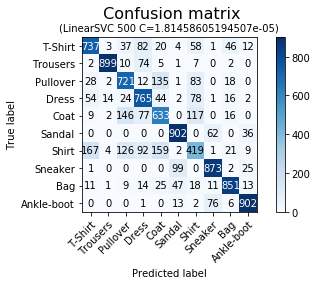

Test accuracy:  0.7702 

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1000
           1       0.97      0.90      0.93      1000
           2       0.67      0.72      0.70      1000
           3       0.68      0.77      0.72      1000
           4       0.62      0.63      0.63      1000
           5       0.84      0.90      0.87      1000
           6       0.54      0.42      0.47      1000
           7       0.85      0.87      0.86      1000
           8       0.87      0.85      0.86      1000
           9       0.90      0.90      0.90      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



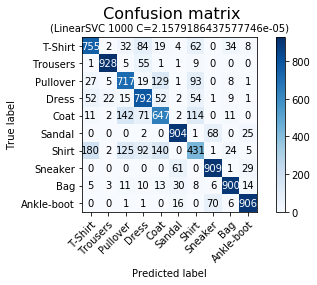

Test accuracy:  0.7889 

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1000
           1       0.96      0.93      0.95      1000
           2       0.68      0.72      0.70      1000
           3       0.70      0.79      0.75      1000
           4       0.65      0.65      0.65      1000
           5       0.89      0.90      0.89      1000
           6       0.56      0.43      0.49      1000
           7       0.86      0.91      0.88      1000
           8       0.91      0.90      0.90      1000
           9       0.92      0.91      0.91      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



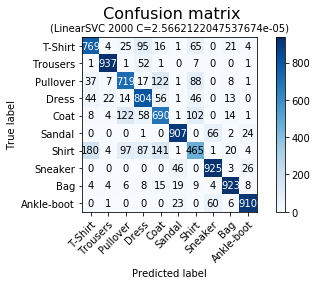

Test accuracy:  0.8049 

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1000
           1       0.95      0.94      0.95      1000
           2       0.73      0.72      0.72      1000
           3       0.72      0.80      0.76      1000
           4       0.66      0.69      0.68      1000
           5       0.91      0.91      0.91      1000
           6       0.59      0.47      0.52      1000
           7       0.88      0.93      0.90      1000
           8       0.91      0.92      0.92      1000
           9       0.93      0.91      0.92      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



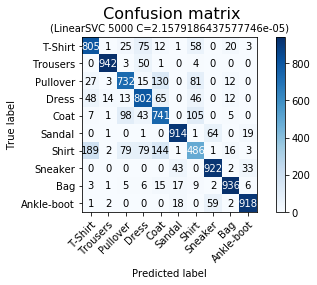

Test accuracy:  0.8198 

              precision    recall  f1-score   support

           0       0.75      0.81      0.77      1000
           1       0.97      0.94      0.96      1000
           2       0.77      0.73      0.75      1000
           3       0.75      0.80      0.77      1000
           4       0.67      0.74      0.70      1000
           5       0.92      0.91      0.92      1000
           6       0.62      0.49      0.54      1000
           7       0.88      0.92      0.90      1000
           8       0.93      0.94      0.93      1000
           9       0.93      0.92      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



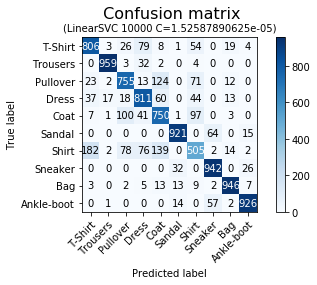

Test accuracy:  0.8321 

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1000
           1       0.97      0.96      0.97      1000
           2       0.77      0.76      0.76      1000
           3       0.77      0.81      0.79      1000
           4       0.68      0.75      0.72      1000
           5       0.94      0.92      0.93      1000
           6       0.64      0.51      0.57      1000
           7       0.88      0.94      0.91      1000
           8       0.94      0.95      0.94      1000
           9       0.94      0.93      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



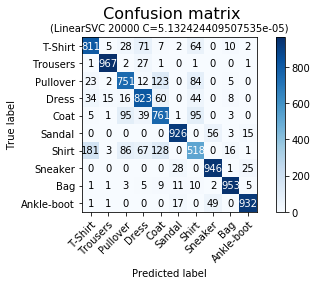

Test accuracy:  0.8388 

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.97      0.97      0.97      1000
           2       0.77      0.75      0.76      1000
           3       0.79      0.82      0.81      1000
           4       0.70      0.76      0.73      1000
           5       0.94      0.93      0.93      1000
           6       0.63      0.52      0.57      1000
           7       0.90      0.95      0.92      1000
           8       0.95      0.95      0.95      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



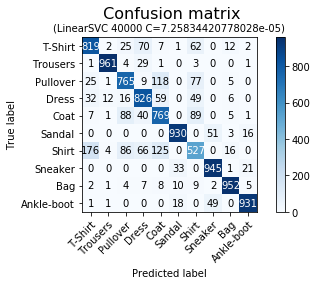

Test accuracy:  0.8425 

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.77      0.77      1000
           3       0.79      0.83      0.81      1000
           4       0.71      0.77      0.74      1000
           5       0.94      0.93      0.93      1000
           6       0.65      0.53      0.58      1000
           7       0.90      0.94      0.92      1000
           8       0.95      0.95      0.95      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



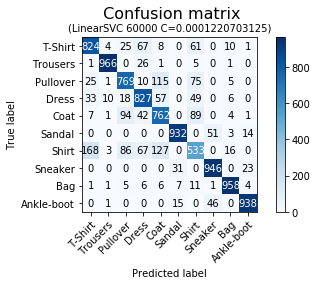

Test accuracy:  0.8455 

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.98      0.97      0.97      1000
           2       0.77      0.77      0.77      1000
           3       0.79      0.83      0.81      1000
           4       0.71      0.76      0.73      1000
           5       0.95      0.93      0.94      1000
           6       0.65      0.53      0.58      1000
           7       0.91      0.95      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



In [25]:
#######  seed 1 ########## optimiertes C

train_LinearSVC(X_tr_500, X_test_vgg16, y_tr_500, y_test_vgg16, 1, '500',1.81458605194507e-05, 'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_tr_1000, X_test_vgg16, y_tr_1000, y_test_vgg16, 1, '1000',2.1579186437577746e-05,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_tr_2000, X_test_vgg16, y_tr_2000, y_test_vgg16, 1, '2000',2.5662122047537674e-05,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_tr_5000, X_test_vgg16, y_tr_5000, y_test_vgg16, 1, '5000',2.1579186437577746e-05,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_tr_10000, X_test_vgg16, y_tr_10000, y_test_vgg16, 1, '10000',1.52587890625e-05,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_tr_20000, X_test_vgg16, y_tr_20000, y_test_vgg16, 1, '20000',5.132424409507535e-05,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_tr_40000, X_test_vgg16, y_tr_40000, y_test_vgg16, 1, '40000',7.25834420778028e-05,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")
train_LinearSVC(X_train_vgg16, X_test_vgg16, y_train_vgg16, y_test_vgg16, 1, '60000',0.0001220703125,'l2', 'squared_hinge',
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "VGG16.pkl")